In [1]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [2]:
import numpy as np
import sys
sys.path.append('..')
import skin_core_scanner_simple as scss
reload(scss)
import equil_solver as es
reload(es)
import newcomb_simple as new
reload(new)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

import lambda_k_plotting_simple as plot
reload(plot)

SyntaxError: invalid syntax (lambda_k_plotting_simple.py, line 108)

In [28]:
lambda_a_mesh, k_a_mesh, stability_maps = scss.scan_lambda_k_space([0.01, 3.0, 10.], [0.01, 1.5, 10], epsilon=0.11,
                         core_radius_norm=0.9, transition_width_norm=0.033, skin_width_norm=0.034, method='lsoda', max_step=1E-2, nsteps=1000)

('lambda_bar:', 0.01)
('lambda_bar:', 0.34222222222222226)
('lambda_bar:', 0.67444444444444451)
('lambda_bar:', 1.0066666666666668)
('lambda_bar:', 1.338888888888889)
('lambda_bar:', 1.6711111111111112)
('lambda_bar:', 2.0033333333333334)
('lambda_bar:', 2.3355555555555556)
('lambda_bar:', 2.6677777777777778)
('lambda_bar:', 3.0)
Saved in Directory:2015-02-22-16-40


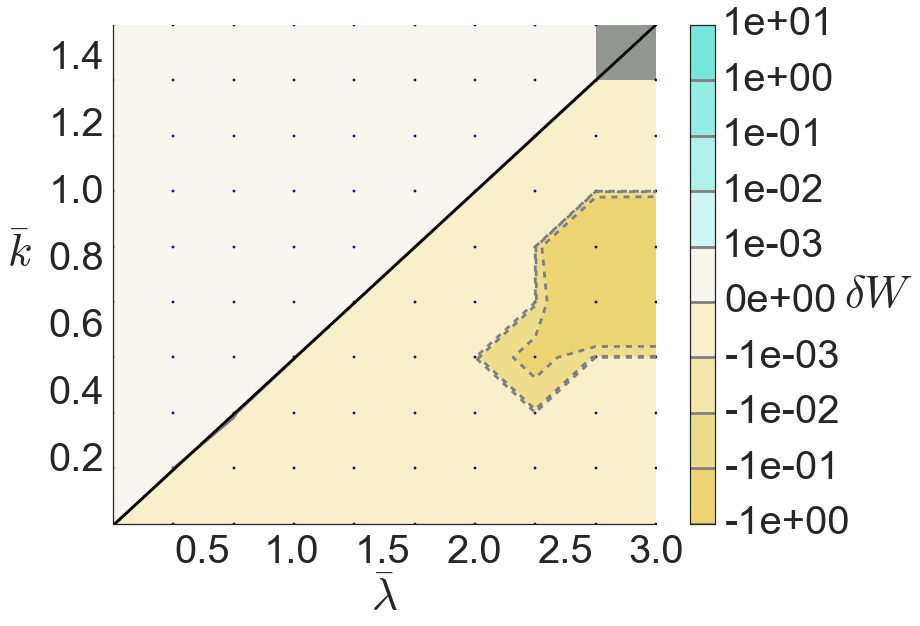

In [29]:
plot.plot_lambda_k_space_dw('../../output/2015-02-22-16-40/meshes.npz', 'ep12-m1', show_points=True, mode_to_plot='m_neg_1', levels=[-1., -1e-1, -1e-2, -1e-3, 0, 1e-3, 1e-2, 1e-1, 1, 1e1],
                            bounds=(1.5,3.0))

<matplotlib.colorbar.Colorbar instance at 0x000000003A19ABC8>

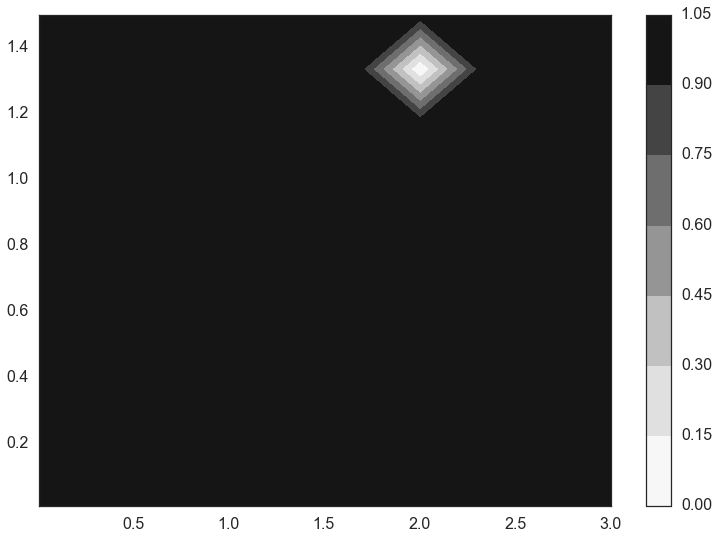

In [22]:
plt.contourf(lambda_a_mesh, k_a_mesh, stability_maps['suydam'][-1])
plt.colorbar()

In [ ]:
epsilons = [0.1, 0.5, 1.0]
for epsilon in epsilons:
    lambda_a_mesh, k_a_mesh, stability_maps = scss.scan_lambda_k_space([0.01, 3.0, 50.], [0.01, 1.5, 50], epsilon=epsilon,
                                                                       core_radius_norm=0.9, transition_width_norm=0.033, skin_width_norm=0.034, 
                                                                       method='lsoda', max_step=1E-2, nsteps=1000)
    

('lambda_bar:', 0.01)
('lambda_bar:', 0.071020408163265311)
('lambda_bar:', 0.13204081632653061)
('lambda_bar:', 0.19306122448979593)
('lambda_bar:', 0.25408163265306122)
('lambda_bar:', 0.31510204081632653)
('lambda_bar:', 0.37612244897959185)
('lambda_bar:', 0.43714285714285717)
('lambda_bar:', 0.49816326530612248)
('lambda_bar:', 0.5591836734693878)
('lambda_bar:', 0.62020408163265306)
('lambda_bar:', 0.68122448979591843)
('lambda_bar:', 0.74224489795918369)
('lambda_bar:', 0.80326530612244906)
('lambda_bar:', 0.86428571428571432)
('lambda_bar:', 0.9253061224489797)
('lambda_bar:', 0.98632653061224496)
('lambda_bar:', 1.0473469387755103)
('lambda_bar:', 1.1083673469387756)
('lambda_bar:', 1.1693877551020408)
('lambda_bar:', 1.2304081632653061)
('lambda_bar:', 1.2914285714285716)
('lambda_bar:', 1.3524489795918369)
('lambda_bar:', 1.4134693877551021)
('lambda_bar:', 1.4744897959183674)
('lambda_bar:', 1.5355102040816326)
('lambda_bar:', 1.5965306122448981)
('lambda_bar:', 1.657551020

In [3]:
epsilons = [1.0]
for epsilon in epsilons:
    lambda_a_mesh, k_a_mesh, stability_maps = scss.scan_lambda_k_space([0.01, 3.0, 50.], [0.01, 1.5, 50], epsilon=epsilon,
                                                                       core_radius_norm=0.9, transition_width_norm=0.033, skin_width_norm=0.034, 
                                                                       method='lsoda', max_step=1E-2, nsteps=1000)

('lambda_bar:', 0.01)
('lambda_bar:', 0.071020408163265311)
('lambda_bar:', 0.13204081632653061)
('lambda_bar:', 0.19306122448979593)
('lambda_bar:', 0.25408163265306122)
('lambda_bar:', 0.31510204081632653)
('lambda_bar:', 0.37612244897959185)
('lambda_bar:', 0.43714285714285717)
('lambda_bar:', 0.49816326530612248)
('lambda_bar:', 0.5591836734693878)
('lambda_bar:', 0.62020408163265306)
('lambda_bar:', 0.68122448979591843)
('lambda_bar:', 0.74224489795918369)
('lambda_bar:', 0.80326530612244906)
('lambda_bar:', 0.86428571428571432)
('lambda_bar:', 0.9253061224489797)
('lambda_bar:', 0.98632653061224496)
('lambda_bar:', 1.0473469387755103)
('lambda_bar:', 1.1083673469387756)
('lambda_bar:', 1.1693877551020408)
('lambda_bar:', 1.2304081632653061)
('lambda_bar:', 1.2914285714285716)
('lambda_bar:', 1.3524489795918369)
('lambda_bar:', 1.4134693877551021)
('lambda_bar:', 1.4744897959183674)
('lambda_bar:', 1.5355102040816326)
('lambda_bar:', 1.5965306122448981)
('lambda_bar:', 1.657551020

/home/jensv/anaconda/lib/python2.7/site-packages/scipy/integrate/_ode.py:1197: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  'Unexpected istate=%s' % istate))


In [5]:
lambda_a_mesh, k_a_mesh, stability_maps = scss.scan_lambda_k_space([0.01, 3.0, 75.], [0.01, 1.5, 75.], epsilon=1.2,
                                                                       core_radius_norm=0.9, transition_width_norm=0.033, skin_width_norm=0.034, 
                                                                       method='lsoda', max_step=1E-2, nsteps=1000)

('lambda_bar:', 0.01)
('lambda_bar:', 0.050405405405405411)
('lambda_bar:', 0.090810810810810813)
('lambda_bar:', 0.13121621621621624)
('lambda_bar:', 0.17162162162162165)
('lambda_bar:', 0.21202702702702705)
('lambda_bar:', 0.25243243243243246)
('lambda_bar:', 0.2928378378378379)
('lambda_bar:', 0.33324324324324328)
('lambda_bar:', 0.37364864864864866)
('lambda_bar:', 0.4140540540540541)
('lambda_bar:', 0.45445945945945954)
('lambda_bar:', 0.49486486486486492)
('lambda_bar:', 0.5352702702702703)
('lambda_bar:', 0.57567567567567579)
('lambda_bar:', 0.61608108108108117)
('lambda_bar:', 0.65648648648648655)
('lambda_bar:', 0.69689189189189193)
('lambda_bar:', 0.73729729729729732)
('lambda_bar:', 0.77770270270270281)
('lambda_bar:', 0.81810810810810819)
('lambda_bar:', 0.85851351351351357)
('lambda_bar:', 0.89891891891891906)
('lambda_bar:', 0.93932432432432444)
('lambda_bar:', 0.97972972972972983)
('lambda_bar:', 1.0201351351351353)
('lambda_bar:', 1.0605405405405406)
('lambda_bar:', 1.1